<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Loading" data-toc-modified-id="Data-Loading-1">Data Loading</a></span></li><li><span><a href="#Figure3:-Streamflow-statistic" data-toc-modified-id="Figure3:-Streamflow-statistic-2">Figure3: Streamflow statistic</a></span></li><li><span><a href="#Quantization-methods" data-toc-modified-id="Quantization-methods-3">Quantization methods</a></span></li><li><span><a href="#Summary-of-Results" data-toc-modified-id="Summary-of-Results-3">Summary of Results </a></span><ul class="toc-item"><li><span><a href="#Figure4:-Histograms-of-different-quantization-methods-for-Station12" data-toc-modified-id="#Figure4:-Histograms-of-different-quantization-methods-for-Station12-3.1">Figure4: Histograms of different quantization methods for Station12</a></span></li><li><span><a href="#Figure5:-Histograms-of-different-quantization-methods-for-Station1" data-toc-modified-id="#Figure5:-Histograms-of-different-quantization-methods-for-Station1-3.2">Figure5: Histograms of different quantization methods for Station1</a></span></li><li><span><a href="#Figure6:-Number-and-center-of-bins-in-different-quantization-methods-for-Station1" data-toc-modified-id="Figure6-3.3">Figure6: Number and center of bins in different quantization methods for Station1</a></span></li><li><span><a href="#Figure7:-Number-and-center-of-bins-in-different-quantization-methods-for-Station12" data-toc-modified-id="Figure7-3.4">Figure7: Number and center of bins in different quantization methods for Station12</a></span></li><li><span><a href="#Table1:-Comparison-of-data-representativeness-with-Surprise-score" data-toc-modified-id="Table1-3.5">Table1: Comparison of data representativeness with Surprise score</a></span></li><li><span><a href="#Table2:-Comparison-of-data-representativeness-with-divergence-score" data-toc-modified-id="Table2-3.6">Table2: Comparison of data representativeness with divergence score</a></span></li><li><span><a href="#Table3:-Optimal-gauges-order-with-different-quantization-methods-and-objective-functions" data-toc-modified-id="Table3-3.7">Table3: Optimal gauges order with different quantization methods and objective functions </a></span></li><li><span><a href="#Table4:-Evolution-of-multivariate-joint-entropy-based-on-maxJE-method" data-toc-modified-id="Table4-3.8">Table4: Evolution of multivariate joint entropy based on maxJE method </a></span></li></ul></li></ul></div>

# Data Loading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from glob import glob
import scipy.stats
import matplotlib.pyplot as plt
import math
from matplotlib import ticker as mticker
originaldata=pd.read_csv('rawdata.csv')
originaldata

,Station1,Station2,Station3,Station4,Station5,Station6,Station7,Station8,Station9,Station10,Station11,Station12
0,2.449407,3.375368,3.262101,2.959110,6.716756,4.825191,10.550857,10.287510,12.258363,30.978630,38.595862,36.160613
1,1.189308,3.870913,2.976101,4.273012,5.445330,9.871253,10.757570,27.079400,35.311108,64.873896,78.522616,80.448161
2,8.427094,39.870120,48.874877,51.876463,56.888545,72.321226,75.860832,120.941252,183.294948,264.677565,263.063505,245.138941
3,37.321604,153.902061,225.175564,237.436759,377.180397,406.629917,206.288227,236.615570,226.563090,307.237786,294.212036,274.928264
4,15.528959,190.883863,240.778147,239.843691,342.350675,394.170505,652.136977,807.030128,853.469756,1169.485765,1117.665935,1114.834251
...,...,...,...,...,...,...,...,...,...,...,...,...
235,2.528694,5.244280,6.733746,6.861172,9.276599,4.986597,12.796383,6.419429,6.691271,24.327003,24.542211,11.978026
236,1.512120,3.131843,3.131843,3.471645,8.806539,2.072793,9.429510,14.486899,25.247300,82.656875,83.223212,73.425583
237,0.957109,2.248358,2.579665,4.165408,28.186589,28.373480,14.237710,157.838103,270.057766,476.572528,408.328928,379.445744
238,0.563505,0.710753,2.964774,3.567923,7.127350,10.369629,27.351242,71.301820,106.584611,410.594276,469.493317,481.103224


# Figure3: Streamflow statistic

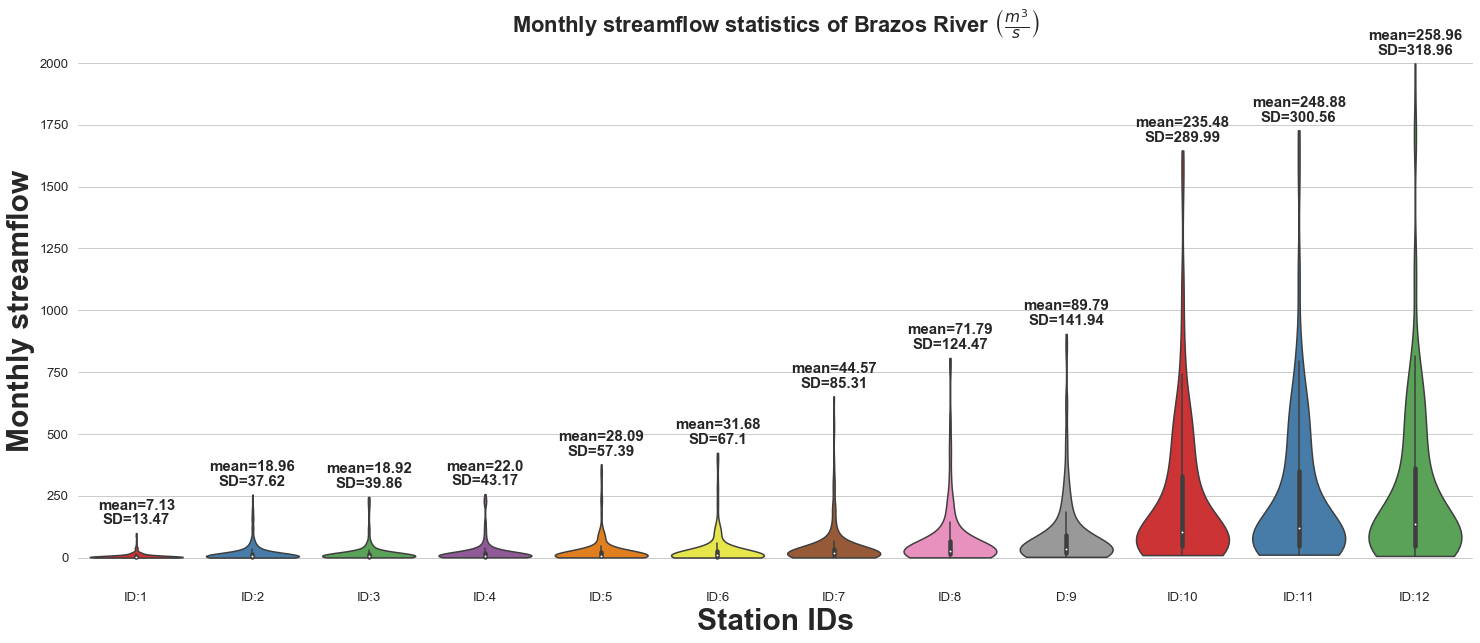

In [2]:
df1=originaldata
df1.columns = ['ID:1', 'ID:2','ID:3','ID:4','ID:5','ID:6',
               'ID:7','ID:8','D:9','ID:10','ID:11','ID:12']
# Set up the matplotlib figure
sns.set(style="whitegrid",font_scale=1.2,)
fig, ax = plt.subplots(figsize=(25,10))
sns.despine(left=True, bottom=True)
sns.violinplot(data=df1 ,cut=0,scale= 'count',inner='box',palette="Set1",label='big',fontsize=12)
ax.set_xlabel('Station IDs',fontweight='bold',fontsize=30)
ax.set_ylabel('Monthly streamflow',fontweight='bold',fontsize=30)
ax.set_title(r'Monthly streamflow statistics of Brazos River $\left(\frac{m^3}{s}\right)$',fontweight='bold',fontsize=22)

yposlist = df1.max()+80
mean=df1.mean()
SD=originaldata.std()
xposlist = range(len(yposlist))

stringlist = ["mean="+str(float("{0:.2f}".format(mean[0]))),"mean="+str(float("{0:.2f}".format(mean[1]))),"mean="+str(float("{0:.2f}".format(mean[2]))),
              "mean="+str(float("{0:.2f}".format(mean[3]))),"mean="+str(float("{0:.2f}".format(mean[4]))),"mean="+str(float("{0:.2f}".format(mean[5]))),
              "mean="+str(float("{0:.2f}".format(mean[6]))),"mean="+str(float("{0:.2f}".format(mean[7]))),"mean="+str(float("{0:.2f}".format(mean[8]))),
              "mean="+str(float("{0:.2f}".format(mean[9]))),"mean="+str(float("{0:.2f}".format(mean[10]))),"mean="+str(float("{0:.2f}".format(mean[11])))]

stringlist2 = ["SD="+str(float("{0:.2f}".format(SD[0]))),"SD="+str(float("{0:.2f}".format(SD[1]))),"SD="+str(float("{0:.2f}".format(SD[2]))),
              "SD="+str(float("{0:.2f}".format(SD[3]))),"SD="+str(float("{0:.2f}".format(SD[4]))),"SD="+str(float("{0:.2f}".format(SD[5]))),
              "SD="+str(float("{0:.2f}".format(SD[6]))),"SD="+str(float("{0:.2f}".format(SD[7]))),"SD="+str(float("{0:.2f}".format(SD[8]))),
              "SD="+str(float("{0:.2f}".format(SD[9]))),"SD="+str(float("{0:.2f}".format(SD[10]))),"SD="+str(float("{0:.2f}".format(SD[11])))]

for i in range(len(stringlist)):
    ax.text(xposlist[i], yposlist[i], stringlist2[i],
    horizontalalignment='center',
    verticalalignment='top',fontsize=15,fontweight='bold')
    ax.text(xposlist[i], yposlist[i]+60, stringlist[i],
    horizontalalignment='center',
    verticalalignment='top',fontsize=15,fontweight='bold')
plt.show()
fig.savefig("statistics_v7.png",dpi=500, bbox_inches="tight", pad_inches=.5,transparent=True)

# Quantization methods

In [3]:
# Data quantization
from Info_theory_function_lists import km_global_quantization
from Info_theory_function_lists import km_local_quantization
from Info_theory_function_lists import eqdistant_global_quantization
from Info_theory_function_lists import eqdistant_local_quantization
from Info_theory_function_lists import floor_global_quantization

a_f=150 # 150(m^3/s) for  a_f parameter defined in the paper

# eq_global_quantized8 returns a series of bin numbers while eq_global_quantized8_values returns a series of quantized values (representing center of the bins that original data falls in)
eq_global_quantized8,eq_global_quantized8_values,NA,eq_global_edges8=eqdistant_global_quantization(originaldata,8)
eq_global_quantized14,eq_global_quantized14_values,NA,eq_global_edges14=eqdistant_global_quantization(originaldata,14)
km_global_quantized8,km_global_quantized8_values,NA,km_global_edges8=km_global_quantization(originaldata,8)
km_global_quantized14,km_global_quantized14_values,NA,km_global_edges14=km_global_quantization(originaldata,14)
floor_global_quantized14,floor_global_quantized14_values,NA,floor_global_edges14=floor_global_quantization(originaldata,a_f)

Station_list=originaldata.columns
eq_local_quantized8= pd.DataFrame(np.zeros(240*12, dtype='f').reshape(240,12),columns=Station_list)
km_local_quantized8= pd.DataFrame(np.zeros(240*12, dtype='f').reshape(240,12),columns=Station_list)
eq_local_quantized8_values= pd.DataFrame(np.zeros(240*12, dtype='f').reshape(240,12),columns=Station_list)
km_local_quantized8_values= pd.DataFrame(np.zeros(240*12, dtype='f').reshape(240,12),columns=Station_list)
eq_local_edges8= pd.DataFrame(np.zeros(9*12, dtype='f').reshape(9,12),columns=Station_list)
km_local_edges8= pd.DataFrame(np.zeros(9*12, dtype='f').reshape(9,12),columns=Station_list)
for Station in Station_list:
    eq_local_quantized8[Station],eq_local_quantized8_values[Station],NA,eq_local_edges8[Station]=eqdistant_local_quantization(originaldata[Station],8)
    km_local_quantized8[Station],km_local_quantized8_values[Station],NA,km_local_edges8[Station]=km_local_quantization(originaldata[Station],8)
    

# Summary of Results 

# Figure4: Histograms of different quantization methods for Station12

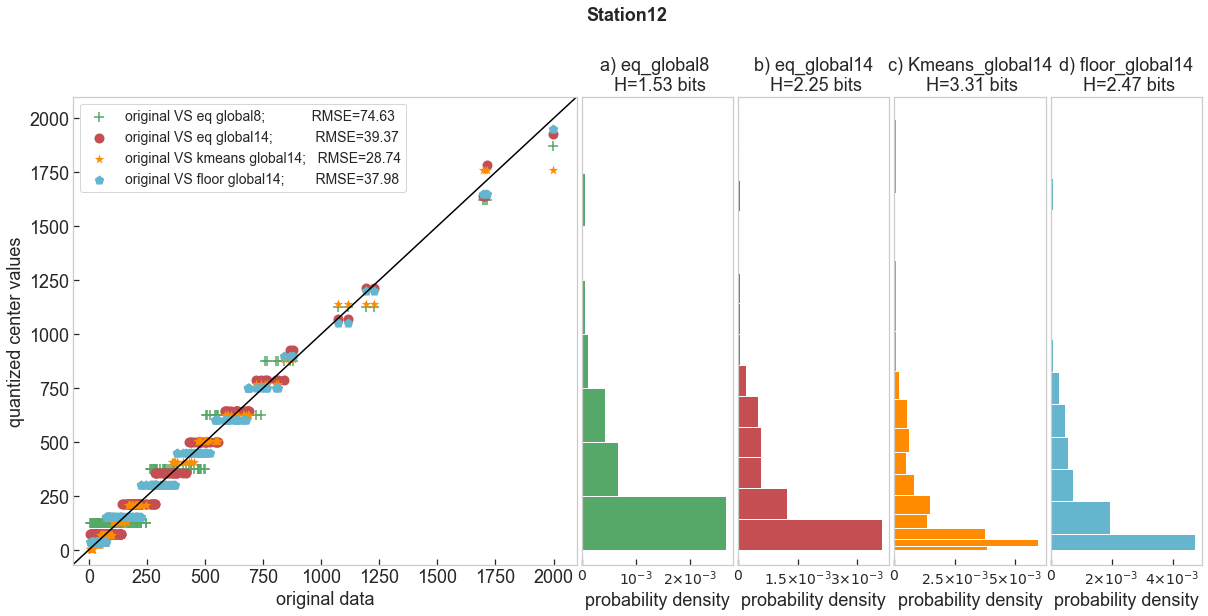

In [4]:
s=11 # station number >> 0 to 11
from sklearn.metrics import mean_squared_error
x = pd.concat([originaldata.iloc[:,s]],axis=1)
y = pd.concat([eq_global_quantized8_values.iloc[:,s]],axis=1)
z = pd.concat([eq_global_quantized14_values.iloc[:,s]],axis=1)
w = pd.concat([km_global_quantized14_values.iloc[:,s]],axis=1)
p = pd.concat([floor_global_quantized14_values.iloc[:,s]],axis=1)

biny=eq_global_edges8
binz=eq_global_edges14
binw=km_global_edges14
binp=floor_global_edges14

x=x.to_numpy()
y=y.to_numpy()
z=z.to_numpy()
w=w.to_numpy()
p=p.to_numpy()


left, width = 0.1, 0.5
bottom, height = 0.1, 0.5
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histy = [left + width + spacing, bottom, 0.15,height]
rect_histz = [left + width + spacing+spacing+ 0.15, bottom, 0.15, height]
rect_histw = [left + width + spacing+2*spacing+ 0.3, bottom, 0.15, height]
rect_histp = [left + width + spacing+3*spacing+ 0.45, bottom, 0.15, height]

# start with a rectangular Figure
fig=plt.figure(figsize=(14, 13))
ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', bottom=True, left=True)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)
ax_histz = plt.axes(rect_histz)
ax_histz.tick_params(direction='in', labelleft=False)
ax_histw = plt.axes(rect_histw)
ax_histw.tick_params(direction='in', labelleft=False)
ax_histp = plt.axes(rect_histp)
ax_histp.tick_params(direction='in', labelleft=False)

si=18
lim_min=np.min([y,z,w,p])
lim_max=np.max([y,z,w,p])
RMSE_eq_global8=math.sqrt(mean_squared_error(x, y))
RMSE_eq_global14=math.sqrt(mean_squared_error(x, z))
RMSE_eq_kmeans_global14=math.sqrt(mean_squared_error(x, w))
RMSE_eq_floorglobal14=math.sqrt(mean_squared_error(x, p))

# the scatter plot:
ax_scatter.scatter(x, y,s=100,c='g',linewidths=.01,marker="+",label = 'original VS eq global8;            RMSE={:.4}'.format(RMSE_eq_global8))
ax_scatter.scatter(x, z,s=100,c='r',linewidths=.01,marker="o",label = 'original VS eq global14;           RMSE={:.4}'.format(RMSE_eq_global14))
ax_scatter.scatter(x, w,s=100,c='darkorange',linewidths=.01,marker="*",label = 'original VS kmeans global14;   RMSE={:.4}'.format(RMSE_eq_kmeans_global14))
ax_scatter.scatter(x, p,s=100,c='c',linewidths=.01,marker="p",label = 'original VS floor global14;        RMSE={:.4}'.format(RMSE_eq_floorglobal14))
ax_scatter.set_ylabel('quantized center values',fontsize=si)
ax_scatter.set_xlabel('original data',fontsize=si)
ax_scatter.plot(ax_scatter.get_xlim(), ax_scatter.get_xlim(), 'k-', color = 'black')
ax_scatter.tick_params(direction='in', labelsize=si)


ax_histy.hist(y, bins=biny, orientation='horizontal',color='g',density=1)
ax_histz.hist(z, bins=binz, orientation='horizontal',color='r',density=1)
ax_histw.hist(w, bins=binw, orientation='horizontal',color='darkorange',density=1)
ax_histp.hist(p, bins=binp, orientation='horizontal',color='c',density=1)


off_set=75
ax_scatter.set_xlim(lim_min-off_set, lim_max+2*off_set)
ax_scatter.set_ylim(lim_min-off_set,lim_max+2*off_set)
ax_histy.set_ylim(ax_scatter.get_xlim())
ax_histz.set_ylim(ax_scatter.get_xlim())
ax_histw.set_ylim(ax_scatter.get_xlim())
ax_histp.set_ylim(ax_scatter.get_xlim())



ax_histy.xaxis.set_major_locator(plt.MaxNLocator(3))
f = mticker.ScalarFormatter(useOffset=True, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
ax_histy.xaxis.set_major_formatter(mticker.FuncFormatter(g))
ax_histy.tick_params(labelsize=si-4)
ax_histy.tick_params(bottom=True, top=False, left=False, right=False)

ax_histz.xaxis.set_major_locator(plt.MaxNLocator(3))
f = mticker.ScalarFormatter(useOffset=False, useMathText=False)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
ax_histz.xaxis.set_major_formatter(mticker.FuncFormatter(g))
ax_histz.tick_params(labelsize=si-4)
ax_histz.tick_params(bottom=True, top=False, left=False, right=False)

ax_histw.xaxis.set_major_locator(plt.MaxNLocator(3))
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
ax_histw.xaxis.set_major_formatter(mticker.FuncFormatter(g))
ax_histw.tick_params(labelsize=si-4)
ax_histw.tick_params(bottom=True, top=False, left=False, right=False)

ax_histp.xaxis.set_major_locator(plt.MaxNLocator(3))
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
ax_histp.xaxis.set_major_formatter(mticker.FuncFormatter(g))
ax_histp.tick_params(labelsize=si-4)
ax_histp.tick_params(bottom=True, top=False, left=False, right=False)

ax_histy.set_title(label='a) eq_global8 \n H=1.53 bits',fontsize=si)
ax_histz.set_title(label='b) eq_global14\n H=2.25 bits',fontsize=si)
ax_histw.set_title(label='c) Kmeans_global14\n H=3.31 bits',fontsize=si)
ax_histp.set_title(label='d) floor_global14\n H=2.47 bits',fontsize=si)

ax_histy.set_xlabel('probability density',fontsize=si)
ax_histz.set_xlabel('probability density',fontsize=si)
ax_histw.set_xlabel('probability density',fontsize=si)
ax_histp.set_xlabel('probability density',fontsize=si)

ax_scatter.set_title('Station{}'.format(s+1),position=[left+2*height, bottom + 2.1*height ] ,fontsize=18,fontweight="bold")
ax_scatter.legend(loc='upper left',fontsize=si-4)
ax_scatter.grid()
ax_histy.grid()
ax_histz.grid()
ax_histw.grid()
ax_histp.grid()

plt.show()
fig.savefig("S12_scatter.png",dpi=500, bbox_inches="tight",transparent=10)


# Figure5: Histograms of different quantization methods for Station1

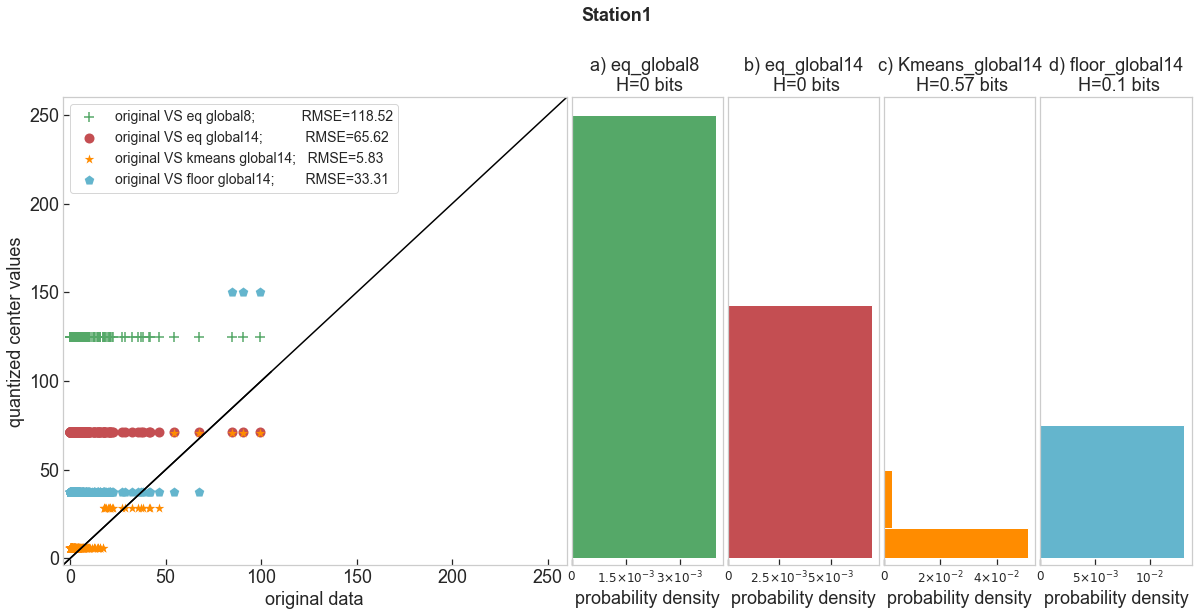

In [5]:
s=0 # station number >> 0 to 11
from sklearn.metrics import mean_squared_error
x = pd.concat([originaldata.iloc[:,s]],axis=1)
y = pd.concat([eq_global_quantized8_values.iloc[:,s]],axis=1)
z = pd.concat([eq_global_quantized14_values.iloc[:,s]],axis=1)
w = pd.concat([km_global_quantized14_values.iloc[:,s]],axis=1)
p = pd.concat([floor_global_quantized14_values.iloc[:,s]],axis=1)

biny=eq_global_edges8
binz=eq_global_edges14
binw=km_global_edges14
binp=floor_global_edges14

x=x.to_numpy()
y=y.to_numpy()
z=z.to_numpy()
w=w.to_numpy()
p=p.to_numpy()


left, width = 0.1, 0.5
bottom, height = 0.1, 0.5
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histy = [left + width + spacing, bottom, 0.15,height]
rect_histz = [left + width + spacing+spacing+ 0.15, bottom, 0.15, height]
rect_histw = [left + width + spacing+2*spacing+ 0.3, bottom, 0.15, height]
rect_histp = [left + width + spacing+3*spacing+ 0.45, bottom, 0.15, height]

# start with a rectangular Figure
fig=plt.figure(figsize=(14, 13))
ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', bottom=True, left=True)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)
ax_histz = plt.axes(rect_histz)
ax_histz.tick_params(direction='in', labelleft=False)
ax_histw = plt.axes(rect_histw)
ax_histw.tick_params(direction='in', labelleft=False)
ax_histp = plt.axes(rect_histp)
ax_histp.tick_params(direction='in', labelleft=False)

si=18
lim_min=np.min([y,z,w,p])
lim_max=np.max([y,z,w,p])
RMSE_eq_global8=math.sqrt(mean_squared_error(x, y))
RMSE_eq_global14=math.sqrt(mean_squared_error(x, z))
RMSE_eq_kmeans_global14=math.sqrt(mean_squared_error(x, w))
RMSE_eq_floorglobal14=math.sqrt(mean_squared_error(x, p))

# the scatter plot:
ax_scatter.scatter(x, y,s=100,c='g',linewidths=.01,marker="+",label = 'original VS eq global8;            RMSE={:.5}'.format(RMSE_eq_global8))
ax_scatter.scatter(x, z,s=100,c='r',linewidths=.01,marker="o",label = 'original VS eq global14;           RMSE={:.4}'.format(RMSE_eq_global14))
ax_scatter.scatter(x, w,s=100,c='darkorange',linewidths=.01,marker="*",label = 'original VS kmeans global14;   RMSE={:.3}'.format(RMSE_eq_kmeans_global14))
ax_scatter.scatter(x, p,s=100,c='c',linewidths=.01,marker="p",label = 'original VS floor global14;        RMSE={:.4}'.format(RMSE_eq_floorglobal14))
ax_scatter.set_ylabel('quantized center values',fontsize=si)
ax_scatter.set_xlabel('original data',fontsize=si)
ax_scatter.plot(ax_scatter.get_xlim(), ax_scatter.get_xlim(), 'k-', color = 'black')
ax_scatter.tick_params(direction='in', labelsize=si)


ax_histy.hist(y, bins=biny, orientation='horizontal',color='g',density=1)
ax_histz.hist(z, bins=binz, orientation='horizontal',color='r',density=1)
ax_histw.hist(w, bins=binw, orientation='horizontal',color='darkorange',density=1)
ax_histp.hist(p, bins=binp, orientation='horizontal',color='c',density=1)


off_set=10
ax_scatter.set_xlim(lim_min-off_set, lim_max+100+off_set)
ax_scatter.set_ylim(lim_min-off_set,lim_max+100+off_set)
ax_histy.set_ylim(ax_scatter.get_xlim())
ax_histz.set_ylim(ax_scatter.get_xlim())
ax_histw.set_ylim(ax_scatter.get_xlim())
ax_histp.set_ylim(ax_scatter.get_xlim())
ax_scatter.plot(ax_scatter.get_xlim(), ax_scatter.get_xlim(), 'k-', color = 'black')



ax_histy.xaxis.set_major_locator(plt.MaxNLocator(3))
f = mticker.ScalarFormatter(useOffset=True, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
ax_histy.xaxis.set_major_formatter(mticker.FuncFormatter(g))
ax_histy.tick_params(labelsize=si-6)
ax_histy.tick_params(bottom=True, top=False, left=False, right=False)

ax_histz.xaxis.set_major_locator(plt.MaxNLocator(3))
f = mticker.ScalarFormatter(useOffset=False, useMathText=False)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
ax_histz.xaxis.set_major_formatter(mticker.FuncFormatter(g))
ax_histz.tick_params(labelsize=si-6)
ax_histz.tick_params(bottom=True, top=False, left=False, right=False)

ax_histw.xaxis.set_major_locator(plt.MaxNLocator(3))
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
ax_histw.xaxis.set_major_formatter(mticker.FuncFormatter(g))
ax_histw.tick_params(labelsize=si-6)
ax_histw.tick_params(bottom=True, top=False, left=False, right=False)

ax_histp.xaxis.set_major_locator(plt.MaxNLocator(3))
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
ax_histp.xaxis.set_major_formatter(mticker.FuncFormatter(g))
ax_histp.tick_params(labelsize=si-6)
ax_histp.tick_params(bottom=True, top=False, left=False, right=False)


ax_histy.set_title(label='a) eq_global8 \n H=0 bits',fontsize=si)
ax_histz.set_title(label='b) eq_global14\n H=0 bits',fontsize=si)
ax_histw.set_title(label='c) Kmeans_global14\n H=0.57 bits',fontsize=si)
ax_histp.set_title(label='d) floor_global14\n H=0.1 bits',fontsize=si)

ax_histy.set_xlabel('probability density',fontsize=si)
ax_histz.set_xlabel('probability density',fontsize=si)
ax_histw.set_xlabel('probability density',fontsize=si)
ax_histp.set_xlabel('probability density',fontsize=si)

ax_scatter.set_title('Station{}'.format(s+1),position=[left+2*height, bottom + 2.1*height ] ,fontsize=18,fontweight="bold")
ax_scatter.legend(loc='upper left',fontsize=si-4)
ax_scatter.grid()
ax_histy.grid()
ax_histz.grid()
ax_histw.grid()
ax_histp.grid()

plt.show()
fig.savefig("S1_scatter.png",dpi=500, bbox_inches="tight",transparent=10)


# Figure6: Number and center of bins in different quantization methods for Station1

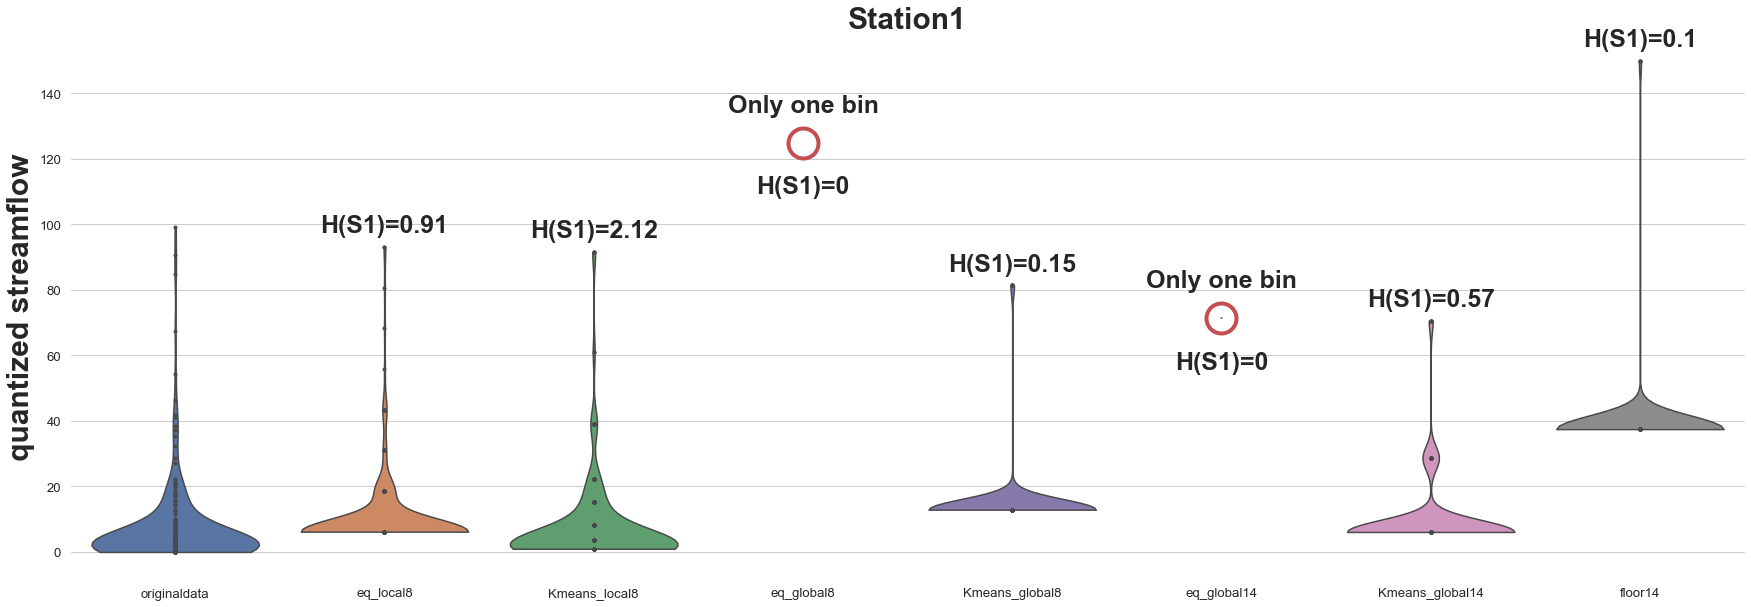

In [6]:
s=0 # station number >> 0 to 11
df1=pd.concat([originaldata.iloc[:,s],eq_local_quantized8_values.iloc[:,s],km_local_quantized8_values.iloc[:,s],
              eq_global_quantized8_values.iloc[:,s],km_global_quantized8_values.iloc[:,s],
              eq_global_quantized14_values.iloc[:,s],km_global_quantized14_values.iloc[:,s],floor_global_quantized14_values.iloc[:,s]],axis=1)
df1.columns = ['originaldata', 'eq_local8','Kmeans_local8','eq_global8','Kmeans_global8','eq_global14','Kmeans_global14','floor14']
df1.head()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(30,10))
sns.set(style="whitegrid",font_scale=1)
sns.set_context("notebook", font_scale=2.1)

yposlist = df1.max()
yposlist1=yposlist['eq_global8']
yposlist2=yposlist['eq_global14']
circle_rad = 15
ax.plot(3,yposlist1,'o',
        ms=circle_rad * 2, mec='r', mfc='none', mew=4)

ax.plot(5, yposlist2, 'o',
        ms=circle_rad * 2, mec='r', mfc='none', mew=4)
sns.despine(left=True, bottom=True)
sns.violinplot(data=df1 ,cut=0,scale= 'count',inner='point')
ax.set_title(r'Station{}'.format(s+1),fontweight='bold',fontsize=30)

stringlist1 = 'Only one bin'
xposlist1 = 3
ax.text(xposlist1, yposlist1+15, stringlist1,
horizontalalignment='center',
verticalalignment='top',fontsize=25,fontweight='bold')
ax.text(xposlist1+2, yposlist2+15, stringlist1,
horizontalalignment='center',
verticalalignment='top',fontsize=25,fontweight='bold')
yposlist2 = df1.max()+10
yposlist2[3]=yposlist2[3]-20
yposlist2[5]=yposlist2[5]-20
xposlist2 = range(len(yposlist))
stringlist2 = ['','H(S1)=0.91', 'H(S1)=2.12','H(S1)=0','H(S1)=0.15','H(S1)=0',
              'H(S1)=0.57','H(S1)=0.1']

for i in range(len(stringlist2)):
    ax.text(xposlist2[i], yposlist2[i], stringlist2[i],
        horizontalalignment='center',
        verticalalignment='top',fontsize=25,fontweight='bold')

ax.set_ylabel('quantized streamflow',fontweight='bold',fontsize=30)   
fig.savefig("quantz_S1_entropy",dpi=500, bbox_inches="tight", pad_inches=.5,transparent=True)

# Figure7: Number and center of bins in different quantization methods for Station12

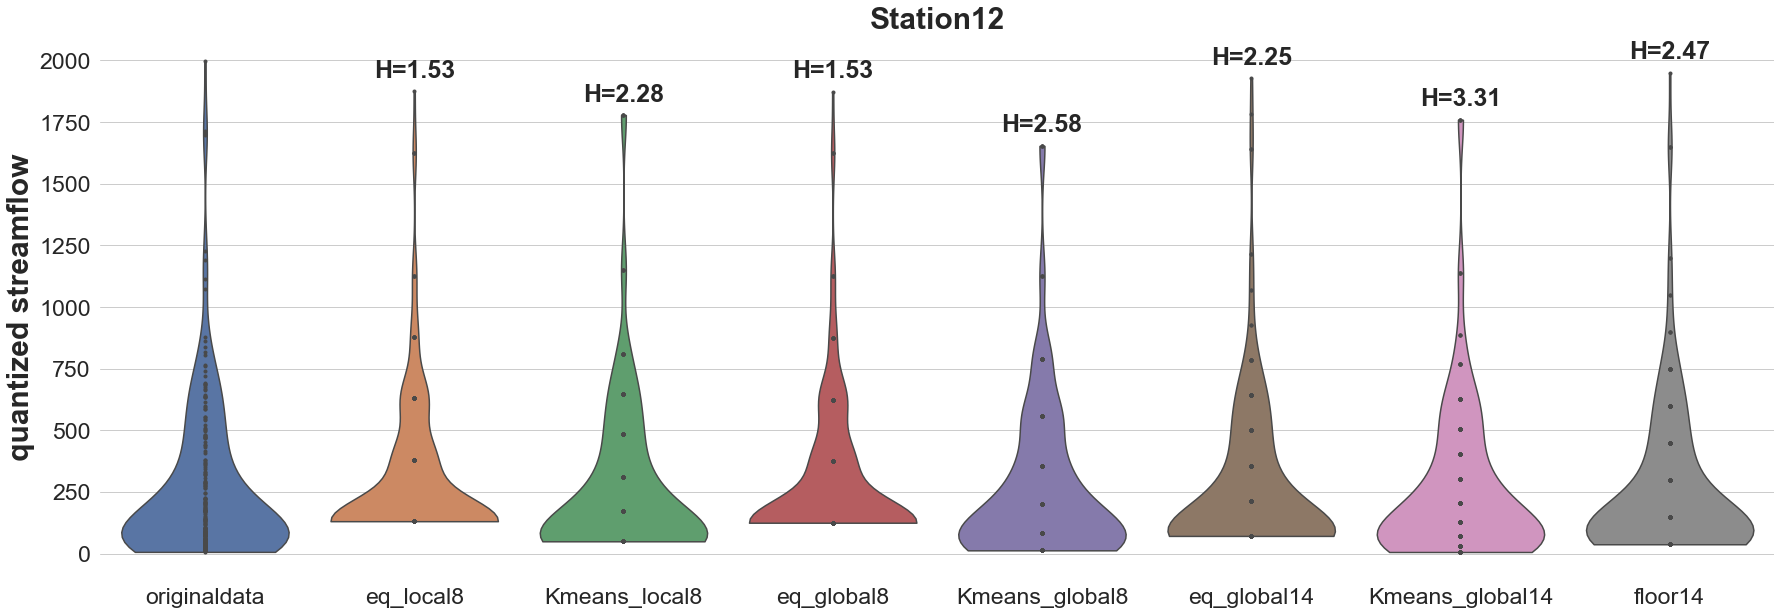

In [7]:
s=11 # station number >> 0 to 11
df1=pd.concat([originaldata.iloc[:,s],eq_local_quantized8_values.iloc[:,s],km_local_quantized8_values.iloc[:,s],
              eq_global_quantized8_values.iloc[:,s],km_global_quantized8_values.iloc[:,s],
              eq_global_quantized14_values.iloc[:,s],km_global_quantized14_values.iloc[:,s],floor_global_quantized14_values.iloc[:,s]],axis=1)
df1.columns = ['originaldata', 'eq_local8','Kmeans_local8','eq_global8','Kmeans_global8','eq_global14','Kmeans_global14','floor14']
df1.head()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(30,10))
sns.set(style="whitegrid",font_scale=1)
sns.set_context("notebook", font_scale=2.1)


sns.despine(left=True, bottom=True)
sns.violinplot(data=df1 ,cut=0,scale= 'count',inner='point')
ax.set_title(r'Station{}'.format(s+1),fontweight='bold',fontsize=30)

yposlist = df1.max()+130
xposlist = range(len(yposlist))
stringlist = ['','H=1.53', 'H=2.28','H=1.53','H=2.58','H=2.25',
              'H=3.31','H=2.47']

for i in range(len(stringlist)):
    ax.text(xposlist[i], yposlist[i], stringlist[i],
        horizontalalignment='center',
        verticalalignment='top',fontsize=25,fontweight='bold')

ax.set_ylabel('quantized streamflow',fontweight='bold',fontsize=30)   

fig.savefig("quantz_S12_entropy",dpi=700, bbox_inches="tight", pad_inches=.5,transparent=True)

# Table1: Comparison of data representativeness with Surprise score

In [8]:
from Info_theory_function_lists import likelihood_calculator_quantized_data
Table1= pd.DataFrame(np.zeros(7*12, dtype='f').reshape(7,12),index=['floor14','km_global14','eq_global14','km_global8','eq_global8','km_local8','eq_local8',]
                  ,columns=['Station1','Station2','Station3','Station4','Station5','Station6','Station7','Station8','Station9','Station10','Station11','Station12',])
for i in np.arange(12):
    Table1.iloc[0,i]=likelihood_calculator_quantized_data(floor_global_quantized14_values.iloc[:,i],floor_global_edges14)
    Table1.iloc[1,i]=likelihood_calculator_quantized_data(km_global_quantized14_values.iloc[:,i],km_global_edges14)
    Table1.iloc[2,i]=likelihood_calculator_quantized_data(eq_global_quantized14_values.iloc[:,i],eq_global_edges14)
    Table1.iloc[3,i]=likelihood_calculator_quantized_data(km_global_quantized8_values.iloc[:,i],km_global_edges8)
    Table1.iloc[4,i]=likelihood_calculator_quantized_data(eq_global_quantized8_values.iloc[:,i],eq_global_edges8)
    Table1.iloc[5,i]=likelihood_calculator_quantized_data(km_local_quantized8_values.iloc[:,i],km_local_edges8.iloc[:,i])
    Table1.iloc[6,i]=likelihood_calculator_quantized_data(eq_local_quantized8_values.iloc[:,i],eq_local_edges8.iloc[:,i])

display('======================================Table1: Comparison of data representativeness with Surprise score ==================================')
display(Table1)

'======================================Table1: Comparison of data representativeness with Surprise score =================================='

,Station1,Station2,Station3,Station4,Station5,Station6,Station7,Station8,Station9,Station10,Station11,Station12
floor14,1521.182983,1588.889771,1592.414185,1608.702881,1656.517700,1675.001709,1705.261230,1808.969116,1886.267334,2207.393799,2234.105713,2242.685547
km_global14,1152.417725,1335.950073,1294.699219,1372.700928,1422.458008,1474.766357,1589.817505,1771.898193,1859.153320,2191.577881,2217.757324,2237.372070
eq_global14,1717.682983,1768.285156,1763.329834,1773.053345,1787.364258,1793.039673,1838.147461,1897.165283,1955.930176,2224.873779,2245.503174,2256.523682
km_global8,1374.202637,1492.303467,1485.907715,1493.603516,1543.185303,1567.692993,1644.040894,1784.313110,1870.785278,2221.367432,2236.136230,2258.791016
eq_global8,1911.448120,1920.794678,1911.448120,1920.794678,1946.510742,1957.095093,1975.083252,2006.457275,2036.342163,2266.300049,2275.899170,2278.858643
km_local8,962.979614,1303.535156,1242.076660,1299.056519,1383.298828,1447.194946,1582.112305,1758.560669,1851.722900,2193.984375,2213.395508,2240.852295
eq_local8,1090.966797,1428.134399,1384.036865,1414.082520,1535.442139,1582.677979,1712.701172,1851.740356,1909.688599,2235.518555,2243.579590,2277.715820


# Table2: Comparison of data representativeness with divergence score

In [9]:
from Info_theory_function_lists import projection_to_fine_prob_grid
from Info_theory_function_lists import Kullback_Leibler_divergence_score


Table2= pd.DataFrame(np.zeros(5*12, dtype='f').reshape(5,12),index=['floor14','km_global14','eq_global14','km_global8','eq_global8']
                  ,columns=['Station1','Station2','Station3','Station4','Station5','Station6','Station7','Station8','Station9','Station10','Station11','Station12',])

bin_num=300 # number of bins in fine grid ==>> to project probabilities into common grid for two quantization methods
max_value=originaldata.max().max()
min_value=originaldata.min().min()
Station_list=originaldata.columns


for i in np.arange(12):
    P=projection_to_fine_prob_grid(eq_local_quantized8_values.iloc[:,i],eq_local_edges8.iloc[:,i].values,max_value,min_value,bin_num)[0]
    Q=projection_to_fine_prob_grid(floor_global_quantized14_values.iloc[:,i],floor_global_edges14,max_value,min_value,bin_num)[0]
    Table2.iloc[0,i]=Kullback_Leibler_divergence_score(P,Q)
    
    P=projection_to_fine_prob_grid(eq_local_quantized8_values.iloc[:,i],eq_local_edges8.iloc[:,i].values,max_value,min_value,bin_num)[0]
    Q=projection_to_fine_prob_grid(km_global_quantized14_values.iloc[:,i],km_global_edges14,max_value,min_value,bin_num)[0]
    Table2.iloc[1,i]=Kullback_Leibler_divergence_score(P,Q)
                                   
    P=projection_to_fine_prob_grid(eq_local_quantized8_values.iloc[:,i],eq_local_edges8.iloc[:,i].values,max_value,min_value,bin_num)[0]
    Q=projection_to_fine_prob_grid(eq_global_quantized14_values.iloc[:,i],eq_global_edges14,max_value,min_value,bin_num)[0]
    Table2.iloc[2,i]=Kullback_Leibler_divergence_score(P,Q)
    
    P=projection_to_fine_prob_grid(eq_local_quantized8_values.iloc[:,i],eq_local_edges8.iloc[:,i].values,max_value,min_value,bin_num)[0]
    Q=projection_to_fine_prob_grid(km_global_quantized8_values.iloc[:,i],km_global_edges8,max_value,min_value,bin_num)[0]
    Table2.iloc[3,i]=Kullback_Leibler_divergence_score(P,Q)
                                   
    P=projection_to_fine_prob_grid(eq_local_quantized8_values.iloc[:,i],eq_local_edges8.iloc[:,i].values,max_value,min_value,bin_num)[0]
    Q=projection_to_fine_prob_grid(eq_global_quantized8_values.iloc[:,i],eq_global_edges8,max_value,min_value,bin_num)[0]
    Table2.iloc[4,i]=Kullback_Leibler_divergence_score(P,Q)    
    
#take average   
Table2.insert(0, "Average Score", Table2.mean(axis=1), True) 

display('==========================Table2: Comparison of data representativeness with divergence score from eq_local8 =====================')
display(Table2)

'==========================Table2: Comparison of data representativeness with divergence score from eq_local8 ====================='

,Average Score,Station1,Station2,Station3,Station4,Station5,Station6,Station7,Station8,Station9,Station10,Station11,Station12
floor14,0.502589,1.719907,0.662282,0.784652,0.753444,0.392310,0.361477,0.110755,0.388863,0.370536,0.199255,0.136918,0.150665
km_global14,0.407961,0.183543,0.506368,0.628804,0.502364,0.556790,0.516912,0.610245,0.343801,0.304698,0.263532,0.289086,0.189391
eq_global14,0.849168,2.547832,1.358847,1.514871,1.446843,0.998564,0.900528,0.503303,0.268704,0.161041,0.172020,0.172050,0.145417
km_global8,0.378782,1.130694,0.300930,0.343951,0.332021,0.034176,0.194011,0.700003,0.505618,0.374513,0.215121,0.218132,0.196214
eq_global8,1.270728,3.355187,1.988531,2.129441,2.061341,1.672767,1.563455,1.070457,0.714200,0.526098,0.090491,0.070866,0.005901


# Table3: Optimal gauges order with different quantization methods and objective functions 

In [10]:
from Info_theory_function_lists import greedy_optimizer_maxJE
from Info_theory_function_lists import greedy_optimizer_minT
Table3_part1_maxJE= pd.DataFrame(np.zeros(7*12, dtype='f').reshape(7,12).astype('int64'),index=['floor14','km_global14','eq_global14','km_global8','eq_global8','km_local8','eq_local8',]
                  ,columns=['Ranked1','Ranked2','Ranked3','Ranked4','Ranked5','Ranked6','Ranked7','Ranked8','Ranked9','Ranked10','Ranked11','Ranked12',])

Table3_part2_minT= pd.DataFrame(np.zeros(7*12, dtype='f').reshape(7,12).astype('int64'),index=['floor14','km_global14','eq_global14','km_global8','eq_global8','km_local8','eq_local8',]
                  ,columns=['Ranked1','Ranked2','Ranked3','Ranked4','Ranked5','Ranked6','Ranked7','Ranked8','Ranked9','Ranked10','Ranked11','Ranked12',])


Table3_part1_maxJE.iloc[0,:]=greedy_optimizer_maxJE(floor_global_quantized14)
Table3_part1_maxJE.iloc[1,:]=greedy_optimizer_maxJE(km_global_quantized14)
Table3_part1_maxJE.iloc[2,:]=greedy_optimizer_maxJE(eq_global_quantized14)
Table3_part1_maxJE.iloc[3,:]=greedy_optimizer_maxJE(km_global_quantized8)
Table3_part1_maxJE.iloc[4,:]=greedy_optimizer_maxJE(eq_global_quantized8)
Table3_part1_maxJE.iloc[5,:]=greedy_optimizer_maxJE(km_local_quantized8)
Table3_part1_maxJE.iloc[6,:]=greedy_optimizer_maxJE(eq_local_quantized8)

Table3_part2_minT.iloc[0,:]=greedy_optimizer_minT(floor_global_quantized14)
Table3_part2_minT.iloc[1,:]=greedy_optimizer_minT(km_global_quantized14)
Table3_part2_minT.iloc[2,:]=greedy_optimizer_minT(eq_global_quantized14)
Table3_part2_minT.iloc[3,:]=greedy_optimizer_minT(km_global_quantized8)
Table3_part2_minT.iloc[4,:]=greedy_optimizer_minT(eq_global_quantized8)
Table3_part2_minT.iloc[5,:]=greedy_optimizer_minT(km_local_quantized8)
Table3_part2_minT.iloc[6,:]=greedy_optimizer_minT(eq_local_quantized8)


display('=================================================Table3 part1: maxJE method =================================================')
display(Table3_part1_maxJE)
display('================================================== Table3 part2: minT method =================================================')
display(Table3_part2_minT)

'=================================================Table3 part1: maxJE method ================================================='

,Ranked1,Ranked2,Ranked3,Ranked4,Ranked5,Ranked6,Ranked7,Ranked8,Ranked9,Ranked10,Ranked11,Ranked12
floor14,12,9,10,11,8,5,7,2,1,3,4,6
km_global14,12,9,7,10,11,6,8,2,5,4,3,1
eq_global14,12,10,9,11,8,2,7,1,3,4,5,6
km_global8,12,9,10,8,11,6,7,2,5,3,1,4
eq_global8,12,10,9,11,8,6,7,1,2,3,4,5
km_local8,12,1,7,5,3,9,2,10,6,8,11,4
eq_local8,10,1,9,12,4,5,8,11,3,2,7,6


'================================================== Table3 part2: minT method ================================================='

,Ranked1,Ranked2,Ranked3,Ranked4,Ranked5,Ranked6,Ranked7,Ranked8,Ranked9,Ranked10,Ranked11,Ranked12
floor14,12,1,2,3,4,5,7,6,8,9,10,11
km_global14,12,1,3,4,2,5,7,6,8,9,10,11
eq_global14,12,1,3,2,4,5,6,7,8,9,10,11
km_global8,12,1,3,6,2,4,5,7,8,9,10,11
eq_global8,12,1,3,2,4,5,6,7,8,9,10,11
km_local8,12,1,3,7,6,2,8,4,5,9,10,11
eq_local8,10,1,5,7,3,6,4,8,2,9,12,11


# Table4: Evolution of multivariate joint entropy based on maxJE method 

In [11]:
from Info_theory_function_lists import info_stats_merging_operator_multiple_varibles

Table4= pd.DataFrame(np.zeros(7*12, dtype='f').reshape(7,12),index=['floor14','km_global14','eq_global14','km_global8','eq_global8','km_local8','eq_local8',]
                  ,columns=['multi_dim_1','multi_dim_2','multi_dim_3','multi_dim_4','multi_dim_5','multi_dim_6','multi_dim_7','multi_dim_8','multi_dim_9','multi_dim_10','multi_dim_11','multi_dim_12',])

for i in np.arange(12):
    Table4.iloc[0,i]=info_stats_merging_operator_multiple_varibles(floor_global_quantized14,Table3_part1_maxJE.iloc[0,0:i+1])[0]
    Table4.iloc[1,i]=info_stats_merging_operator_multiple_varibles(km_global_quantized14,Table3_part1_maxJE.iloc[1,0:i+1])[0]
    Table4.iloc[2,i]=info_stats_merging_operator_multiple_varibles(eq_global_quantized14,Table3_part1_maxJE.iloc[2,0:i+1])[0]
    Table4.iloc[3,i]=info_stats_merging_operator_multiple_varibles(km_global_quantized8,Table3_part1_maxJE.iloc[3,0:i+1])[0]
    Table4.iloc[4,i]=info_stats_merging_operator_multiple_varibles(eq_global_quantized8,Table3_part1_maxJE.iloc[4,0:i+1])[0]
    Table4.iloc[5,i]=info_stats_merging_operator_multiple_varibles(km_local_quantized8,Table3_part1_maxJE.iloc[5,0:i+1])[0]
    Table4.iloc[6,i]=info_stats_merging_operator_multiple_varibles(eq_local_quantized8,Table3_part1_maxJE.iloc[6,0:i+1])[0]

display('================================Evolution of multivariate joint entropy based on ranking obtained by maxJE objective function ===============================')
display(Table4)

'================================Evolution of multivariate joint entropy based on ranking obtained by maxJE objective function ==============================='

,multi_dim_1,multi_dim_2,multi_dim_3,multi_dim_4,multi_dim_5,multi_dim_6,multi_dim_7,multi_dim_8,multi_dim_9,multi_dim_10,multi_dim_11,multi_dim_12
floor14,2.469872,3.071116,3.499475,3.703608,3.884984,4.023557,4.089808,4.098141,4.098141,4.098141,4.098141,4.098141
km_global14,3.306836,4.761791,5.497013,6.044854,6.313804,6.545909,6.740856,6.833876,6.896743,6.918597,6.930076,6.930076
eq_global14,2.245169,2.752982,3.082759,3.231060,3.291436,3.328394,3.345061,3.345061,3.345061,3.345061,3.345061,3.345061
km_global8,2.584706,3.480582,4.165193,4.443262,4.684792,4.844553,4.934177,4.982950,5.011095,5.019428,5.019428,5.019428
eq_global8,1.530877,1.856700,2.021665,2.121715,2.173234,2.211068,2.219401,2.219401,2.219401,2.219401,2.219401,2.219401
km_local8,2.277285,4.109318,5.018967,5.530899,5.760938,5.927528,6.059682,6.157250,6.235887,6.282742,6.326614,6.348469
eq_local8,1.638716,2.350065,2.676677,2.930051,3.092404,3.172084,3.231936,3.263132,3.287715,3.307944,3.321465,3.329798
